In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline
import cmocean
import cmocean.cm as cmo

In [30]:
#%matplotlib 
#cax = fig.add_axes([.16, .855, .7, .02])
#cb = fig.colorbar(scatter, cax=cax, orientation='horizontal',)
#cb.ax.tick_params(labelcolor='w')
#cb.set_label('Phycocyanin\n'+'[$\mu$g/L]', size=13, weight='bold', loc='left', color='w')



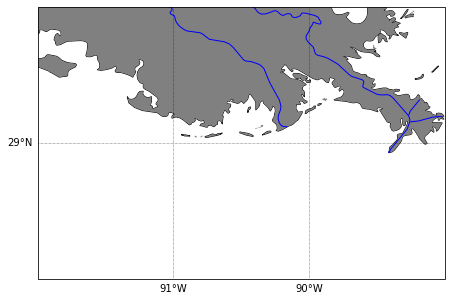

In [2]:
# Change this!
lat_top=30
lat_bot=28
lon_left=-92.
lon_rigth=-89
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [3]:
#making it a function

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'white'}
    gl.ylabel_style = {'size': 15, 'color': 'white'}
    return fig, ax

In [1]:
fig, ax = plot_mapbase(extent)
fig

NameError: name 'plot_mapbase' is not defined

In [5]:
# Ploting data
# load your csv file
df = pd.read_csv('../Data_other/DATA_FOR_MAP.csv')
df2 = df.drop([6, 7])
lons = df['Lon'] # or whatever name you have for longitude
lats = df['Lat'] # or whatever name you have for latitude
lons2 = df2['Lon'] # or whatever name you have for longitude
lats2 = df2['Lat'] # or whatever name you have for latitude
Pw_slope_350 = df['PW slope abs 350 cm']
Pw_slope_412 = df['PW slope abs 412 cm']
BC_slope_350 = df2['BC slope abs 350 cm']
BC_slope_412 = df2['BC slope abs 412 cm']
PW_flux_350 = df['PW Flux 350'] 
PW_flux_412 = df['PW Flux 412'] 
BC_flux_350 = df2['BC Flux 350'] 
BC_flux_412 = df2['BC Flux 412'] 
PW_flux_bbl_350 = df['PW Flux 350 in BBL ']
PW_flux_bbl_412 = df['PW Flux 412 in BBL ']
BC_flux_bbl_350 = df2['BC Flux 350 in BBL ']
BC_flux_bbl_412 = df2['BC Flux 412 in BBL']
PW_flux_WC_350 = df['PW Flux 350 in WC '] 
PW_flux_WC_412 = df['PW Flux 412 in WC'] 
BC_flux_WC_350 = df2['BC Flux 350 in WC ']
BC_flux_WC_412 = df2['BC Flux 412 in WC '] 
lab = df['Station']


In [6]:
path = '../SAT_DATA/IOPS_OCT_NOV_L2_MODIS/A2021285191500.L2_LAC_IOP.x.nc'
def load_satdata(path):
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    data = data.where(mask, drop=True)
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    return data
ds = load_satdata(path)
ds

<xarray.Dataset>
Dimensions:           (number_of_lines: 1777, pixels_per_line: 1308)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/32)
    a_412_giop        (number_of_lines, pixels_per_line) float32 0.0192 ... nan
    a_443_giop        (number_of_lines, pixels_per_line) float32 0.0198 ... nan
    a_469_giop        (number_of_lines, pixels_per_line) float32 0.0208 ... nan
    a_488_giop        (number_of_lines, pixels_per_line) float32 0.0221 ... nan
    a_531_giop        (number_of_lines, pixels_per_line) float32 0.0452 ... nan
    a_547_giop        (number_of_lines, pixels_per_line) float32 0.0521 ... nan
    ...                ...
    aph_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0008001 .....
    adg_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0003002 .....
    bbp_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.00012 ... 0.0
    l2_flags          (number_of_lines, pixels_per_line) float64 0.0 ... 1.07...
    lat               (number_of_lines, pixels_per_line) float32 17.68 ... 30.12
    lon               (number_of_lines, pixels_per_line) float32 -78.38 ... -...

In [8]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [8]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}
plt.rcParams.update(params)

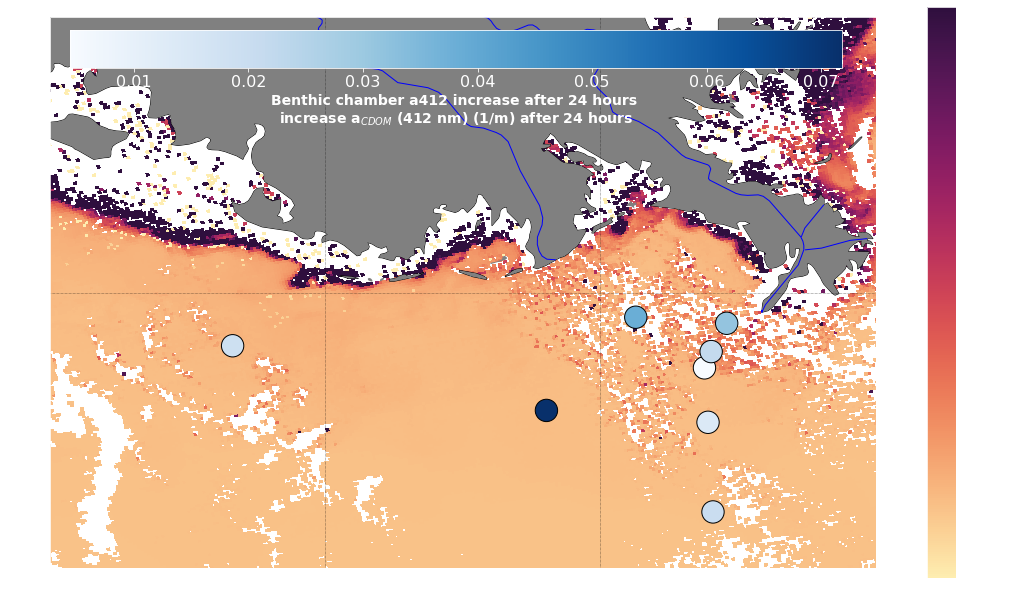

In [14]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset
var = BC_flux_412

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.ax.tick_params(labelcolor='w') 
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=20, weight='bold', color='w')
tick_font_size = 16
cb.ax.tick_params(labelsize=tick_font_size)

mappable = ax.scatter(lons2, lats2, # lon, lat variable as x,y
           c=var,
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= 'Blues', # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=500, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.14, .8, .58, .05])
cb2 = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb2.set_label('Benthic chamber a412 increase after 24 hours \n'+'increase a$_{CDOM}$ (412 nm) (1/m) after 24 hours', size=14, weight='bold', color='w')
cb2.ax.tick_params(labelcolor='w') 
cb2.ax.tick_params(labelsize=tick_font_size)

fig.set_size_inches(18.5, 10.5)
fig.savefig('../MAPS_Figures/BC_flux_412.png')

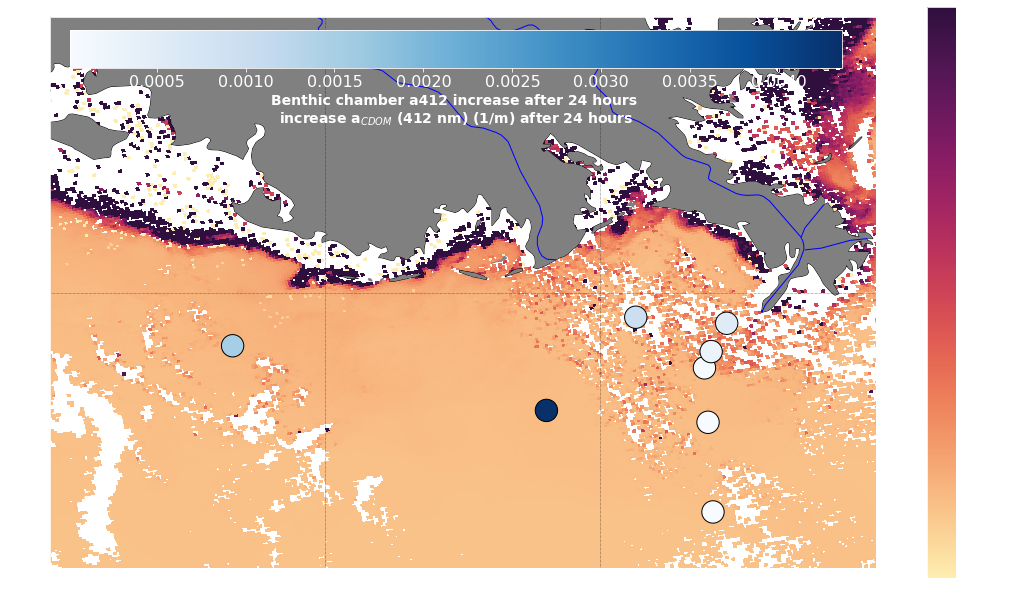

In [15]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset
var = BC_flux_WC_412

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.ax.tick_params(labelcolor='w') 
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=20, weight='bold', color='w')
tick_font_size = 16
cb.ax.tick_params(labelsize=tick_font_size)

mappable = ax.scatter(lons2, lats2, # lon, lat variable as x,y
           c=var,
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= "Blues", # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=500, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.14, .8, .58, .05])
cb2 = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb2.set_label('Benthic chamber a412 increase after 24 hours \n'+'increase a$_{CDOM}$ (412 nm) (1/m) after 24 hours', size=14, weight='bold', color='w')
cb2.ax.tick_params(labelcolor='w') 
cb2.ax.tick_params(labelsize=tick_font_size)

fig.set_size_inches(18.5, 10.5)
fig.savefig('../MAPS_Figures/BC_flux_WC_412.png')

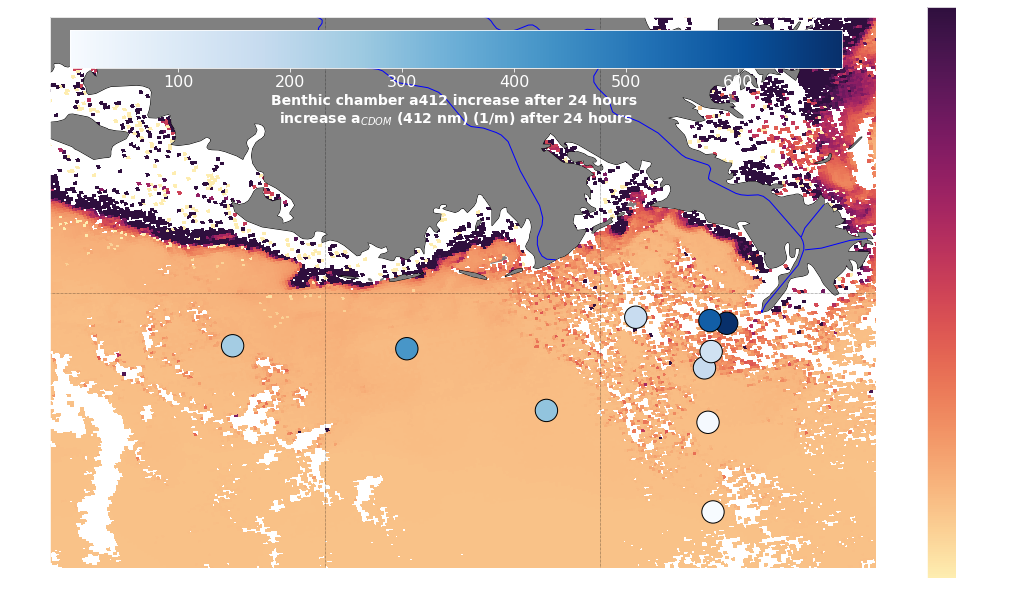

In [16]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset
var = PW_flux_412

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.ax.tick_params(labelcolor='w') 
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=20, weight='bold', color='w')
tick_font_size = 16
cb.ax.tick_params(labelsize=tick_font_size)

mappable = ax.scatter(lons, lats, # lon, lat variable as x,y
           c=var,
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= "Blues", # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=500, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.14, .8, .58, .05])
cb2 = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb2.set_label('Benthic chamber a412 increase after 24 hours \n'+'increase a$_{CDOM}$ (412 nm) (1/m) after 24 hours', size=14, weight='bold', color='w')
cb2.ax.tick_params(labelcolor='w') 
cb2.ax.tick_params(labelsize=tick_font_size)

fig.set_size_inches(18.5, 10.5)
fig.savefig('../MAPS_Figures/PW_flux_412.png')

/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


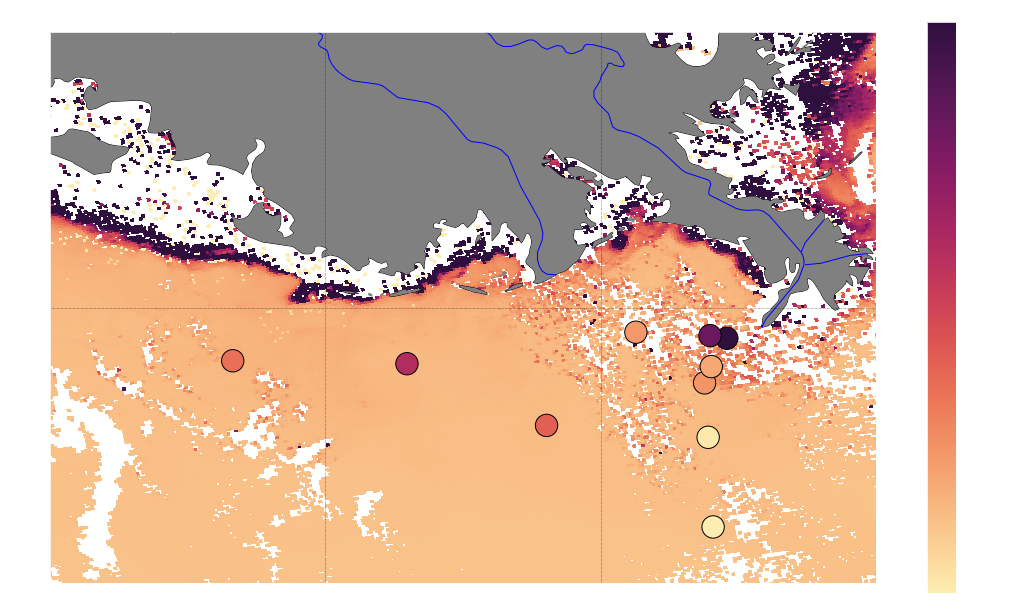

In [83]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset
var = Pw_slope_412

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
mappable = ax.scatter(lons, lats, # lon, lat variable as x,y
           c=var,
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=500, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cb = fig.colorbar(mappable)
cb.set_label('Absorption at 412 nm', size=16, color='#FFFFFF')
cb.ax.set_yticklabels(['low','medium','medium','high'])
plt.title(label="Map of CDOM benthic flux and Satalite CDOM data", size = 26, color='#FFFFFF') 
fig.set_size_inches(18.5, 10.5)
fig.savefig('PW_slope_412.png')

/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


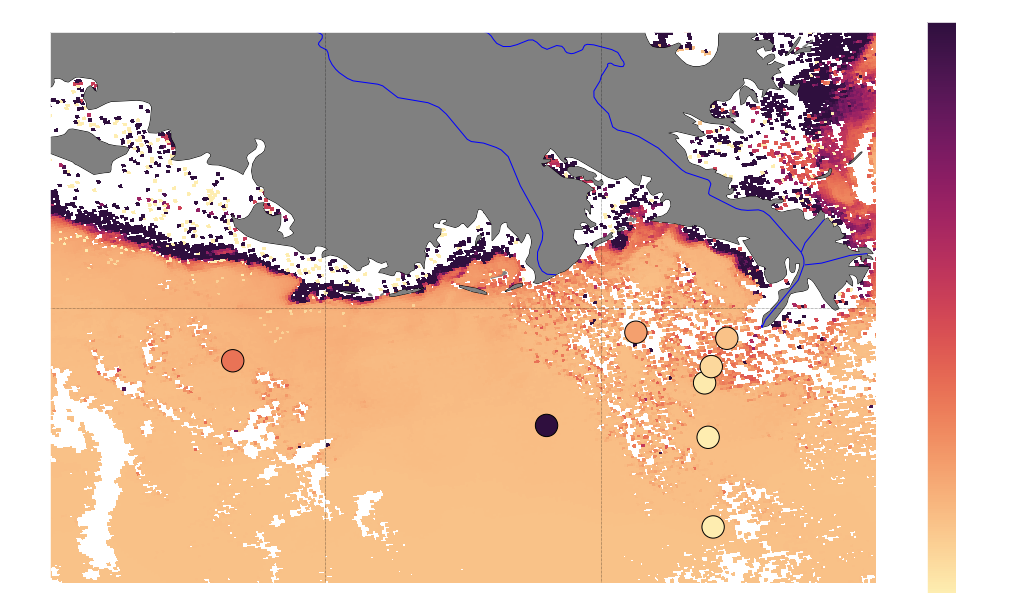

In [84]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset
var = BC_flux_WC_412

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
mappable = ax.scatter(lons2, lats2, # lon, lat variable as x,y
           c=var,
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=500, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cb = fig.colorbar(mappable)
cb.set_label('Absorption at 412 nm', size=16, color='#FFFFFF')
cb.ax.set_yticklabels(['low','','','medium','','','high','',])
plt.title(label="Map of CDOM benthic flux and Satalite CDOM data", size = 26, color='#FFFFFF') 
fig.set_size_inches(18.5, 10.5)
fig.savefig('BC_flux_WC_412.png')

/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


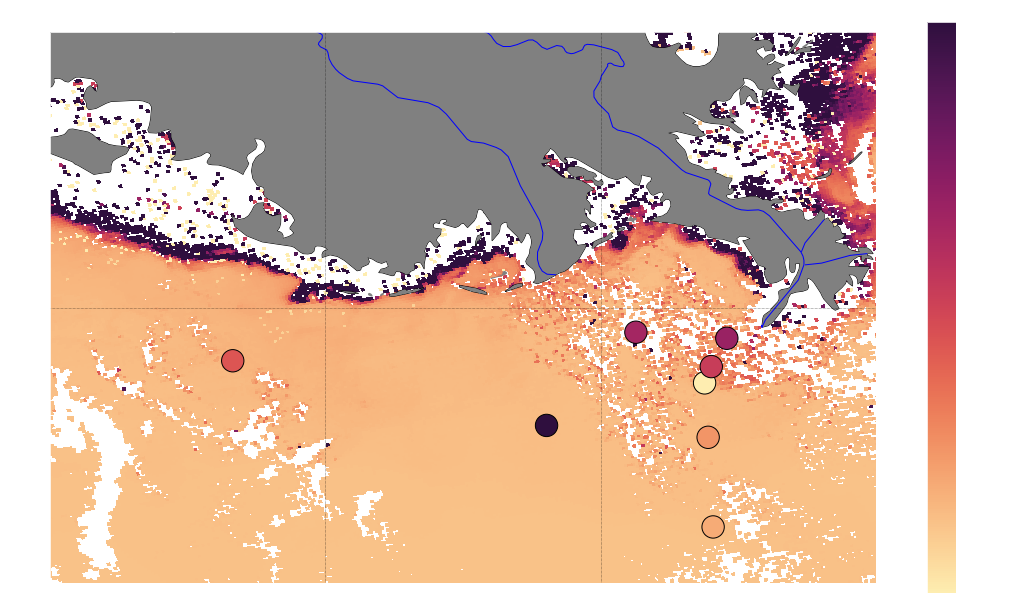

In [85]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset
var = BC_slope_412

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
mappable = ax.scatter(lons2, lats2, # lon, lat variable as x,y
           c=var,
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=500, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cb = fig.colorbar(mappable)
cb.set_label('Absorption at 412 nm', size=16, color='#FFFFFF')
cb.ax.set_yticklabels(['low','','','medium','','high'])
plt.title(label="Map of CDOM benthic flux and Satalite CDOM data", size = 26, color='#FFFFFF') 
fig.set_size_inches(18.5, 10.5)
fig.savefig('BC_slope_412.png')

In [113]:
df = pd.read_csv('/mnt/beegfs/home/hbridgham2021/Desktop/Data_other/DATA_FOR_MAP.csv')
df = df.drop([6, 7])
lons = df['Lon'] # or whatever name you have for longitude
lats = df['Lat'] # or whatever name you have for latitude
PW_slope_350 = df['PW slope abs 350 cm']
PW_slope_412 = df['PW slope abs 412 cm']
BC_slope_350 = df['BC slope abs 350 cm']
BC_slope_412 = df['BC slope abs 412 cm']
PW_flux_350 = df['PW Flux 350'] 
PW_flux_412 = df['PW Flux 412'] 
BC_flux_350 = df['BC Flux 350'] 
BC_flux_412 = df['BC Flux 412'] 
PW_flux_bbl_350 = df['PW Flux 350 in BBL ']
PW_flux_bbl_412 = df['PW Flux 412 in BBL ']
BC_flux_bbl_350 = df['BC Flux 350 in BBL ']
BC_flux_bbl_412 = df['BC Flux 412 in BBL']
PW_flux_WC_350 = df['PW Flux 350 in WC '] 
PW_flux_WC_412 = df['PW Flux 412 in WC'] 
BC_flux_WC_350 = df['BC Flux 350 in WC ']
BC_flux_WC_412 = df['BC Flux 412 in WC '] 
lab = df['Station']

In [108]:
fig, ax = plt.scatter(figsize=(8,10))
plt.scatter(df['PW slope abs 350 cm'], df['BC slope abs 350 cm'], c='b')
ax.set_xlabel('Pore water slope 350', size=20)
ax.set_ylabel('Benthic chamber slope 350', color='b', size=20)

fig

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

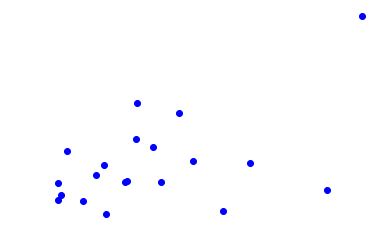

In [119]:
plt.scatter(PW_slope_350, BC_slope_350, c='b')

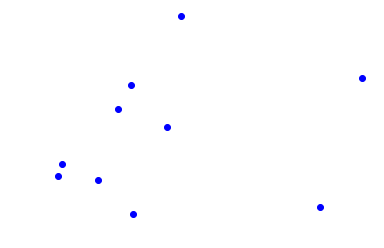

In [120]:
plt.scatter(PW_slope_412, BC_slope_412, c='b')